#   data    wrangling
    This process involves 'cleaning', 'structuring', and enriching the data to make it more accessible and valuable for 'decision-making'. Data wrangling is essential because raw data is often messy, incomplete, and unstructured, making it difficult to derive meaningful insights without significant preprocessing.

# steps
1. gathering data
2. clean data libraries
3. how to do

In [416]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

#data import
df=sns.load_dataset('titanic')


In [417]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [419]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [420]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [421]:
df.drop(columns='deck',inplace=True)

In [422]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [423]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [424]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

# outliers remover

<Axes: xlabel='sex', ylabel='age'>

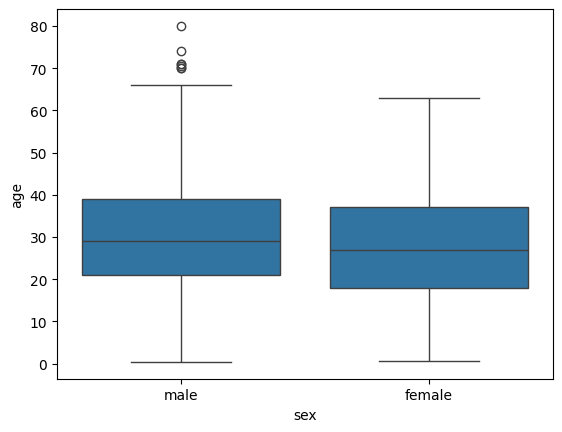

In [425]:
import seaborn as sns
sns.boxplot(data=df,y='age',x='sex')

In [426]:
#IQR METHOD
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR


17.875

In [427]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [428]:
df=df[(df['age']>lower_bound)&(df['age']<upper_bound)]

In [429]:
df.shape

(703, 14)

In [430]:
#IQR METHOD
#Q1=df['fare'].quantile(0.25)
#Q3=df['fare'].quantile(0.75)
#IQR=Q3-Q1
#IQR

#lower_bound=Q1-1.5*IQR
#upper_bound=Q3+1.5*IQR
#df=df[(df['fare']>lower_bound)&(df['fare']<upper_bound)]



In [431]:
df.shape

(703, 14)

In [432]:
#df.columns

In [433]:
#zscore method
#from scipy import stats

#import numpy as np





In [434]:
#if 'age' in df.columns:
    #z = np.abs(stats.zscore(df['age']))
    #threshold = 3
    #print(np.where(z > 3))
#else:
    #print("'age' column does not exist in the dataframe.")
    


In [435]:
#df = df[z < threshold].all(axis=1)


In [436]:
#df

In [437]:
df.shape

(703, 14)

In [438]:
#finding duplicate values
df.duplicated().sum()

38

In [439]:
df1=df[df.duplicated()]
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
133,1,2,female,29.0,1,0,26.0000,S,Second,woman,False,Southampton,yes,False
173,0,3,male,21.0,0,0,7.9250,S,Third,man,True,Southampton,no,True
213,0,2,male,30.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
313,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,Southampton,no,True


In [440]:
df1.shape

(38, 14)

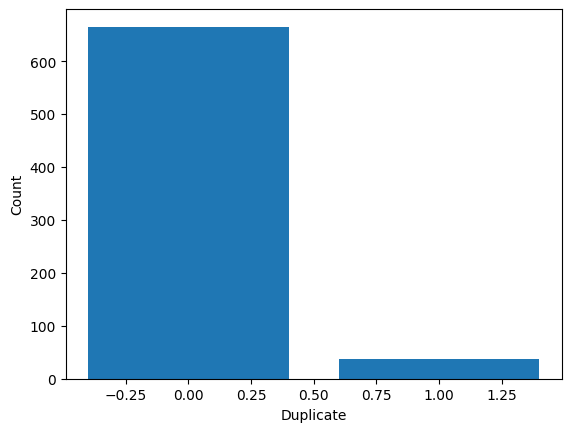

In [441]:
df1=df.duplicated()
df1_count=df1.value_counts()

plt.bar(df1_count.index,df1_count.values)
plt.xlabel('Duplicate')
plt.ylabel('Count')
plt.show()

In [442]:
#dropping dulicates
df.drop_duplicates(inplace=True)

In [443]:
df.shape

(665, 14)

# data normalization


In [385]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
#DATA
df
#coloumns to normalize
columns_to_normalize=['age','fare']
#create the scaler tol
scaler=MinMaxScaler()
#fit and transform the data
df[columns_to_normalize]=scaler.fit_transform(df[columns_to_normalize])
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.339415,1,0,0.014151,S,Third,man,True,Southampton,no,False
1,1,1,female,0.591066,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.402328,0,0,0.015469,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.543882,1,0,0.103644,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.543882,0,0,0.015713,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,0.433784,0,0,0.020495,S,Second,man,True,Southampton,no,True
885,0,3,female,0.606795,0,5,0.056848,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.292230,0,0,0.058556,S,First,woman,False,Southampton,yes,True
889,1,1,male,0.402328,0,0,0.058556,C,First,man,True,Cherbourg,yes,True


In [386]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,0.424060,2.230075,0.451899,0.542857,0.458647,0.070202
std,0.494571,0.844720,0.218659,0.951401,0.875635,0.106258
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.307958,0.000000,0.000000,0.015713
50%,0.000000,2.000000,0.433784,0.000000,0.000000,0.031425
75%,1.000000,3.000000,0.591066,1.000000,1.000000,0.069291
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [445]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#DATA
df
#coloumns to normalize
columns_to_normalize=['age','fare']

#create the scaler tol
scaler=StandardScaler()

#fit and transform the data
df[columns_to_normalize]=scaler.fit_transform(df[columns_to_normalize])
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.514815,1,0,-0.527893,S,Third,man,True,Southampton,no,False
1,1,1,female,0.636935,1,0,0.649227,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.226877,0,0,-0.515485,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.420982,1,0,0.314965,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.420982,0,0,-0.513187,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,-0.082909,0,0,-0.468149,S,Second,man,True,Southampton,no,True
885,0,3,female,0.708920,0,5,-0.125766,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.730768,0,0,-0.109681,S,First,woman,False,Southampton,yes,True
889,1,1,male,-0.226877,0,0,-0.109681,C,First,man,True,Cherbourg,yes,True


In [446]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,665.000000,665.000000,6.650000e+02,665.000000,665.000000,6.650000e+02
mean,0.424060,2.230075,1.282182e-16,0.542857,0.458647,-4.941745e-17
std,0.494571,0.844720,1.000753e+00,0.951401,0.875635,1.000753e+00
min,0.000000,1.000000,-2.068238e+00,0.000000,0.000000,-6.611697e-01
25%,0.000000,1.000000,-6.587838e-01,0.000000,0.000000,-5.131870e-01
50%,0.000000,2.000000,-8.290869e-02,0.000000,0.000000,-3.652043e-01
75%,1.000000,3.000000,6.369351e-01,1.000000,1.000000,-8.575244e-03
max,1.000000,3.000000,2.508529e+00,5.000000,6.000000,8.756948e+00


# log transformation


In [447]:
kashti=sns.load_dataset('titanic')
kashti.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [448]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [452]:
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
